In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from scipy import stats

In [25]:
df = pd.read_csv('../data/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [26]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [27]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix['N'].sort_values(ascending=False))

N            1.000000
Lattitude    0.742794
P            0.643212
b9           0.535288
b8a          0.528105
b8           0.526838
Sigma_VH     0.503636
Sigma_VV     0.454871
Mn           0.383059
b5           0.376916
Fe           0.338775
b1           0.312106
Zn           0.186446
B            0.122336
b12          0.098796
b2           0.064155
No           0.057689
Ca           0.035696
Cu           0.028677
b4          -0.126046
b3          -0.137538
K           -0.138219
b7          -0.333109
beta0_vv    -0.424251
b11         -0.462297
b6          -0.509165
gamma0_vv   -0.517893
beta0_vh    -0.520638
gamma0_vh   -0.540866
plia        -0.592965
lia         -0.593177
iafe        -0.593590
Longitude   -0.695291
Name: N, dtype: float64


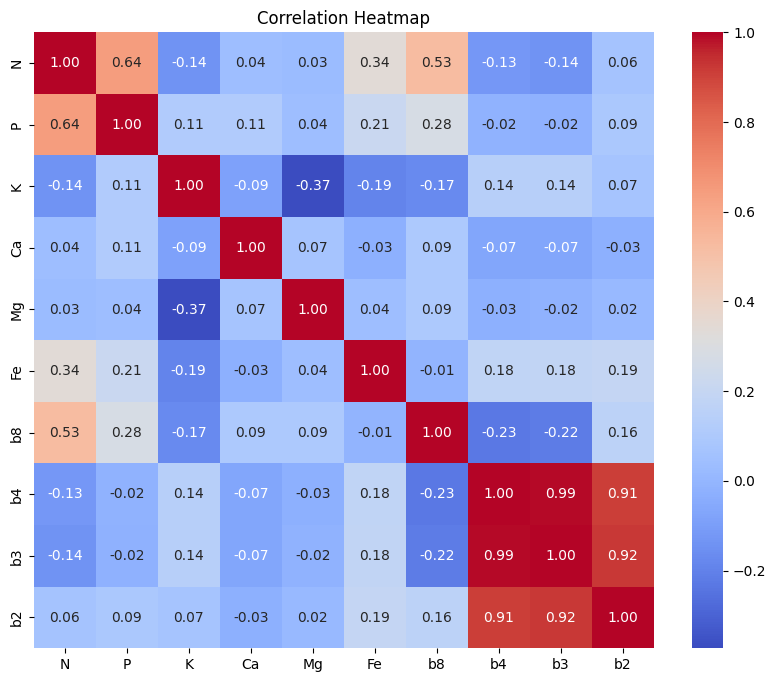

In [28]:
plt.figure(figsize=(10, 8))
relevant_features = ['N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'b8', 'b4', 'b3', 'b2']

# Ensure feature columns are numeric (convert invalid strings to NaN)
corr_df = df[relevant_features].copy()
for col in corr_df.columns:
	corr_df[col] = pd.to_numeric(corr_df[col], errors='coerce')

# Compute correlation on the cleaned numeric dataframe
corr_subset = corr_df.corr()
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
y = df['N']
X = df[['P', 'K', 'Ca', 'Mg', 'Fe', 'b8', 'b4', 'b3', 'b2']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data train:", len(X_train))
print("Jumlah data test :", len(X_test))

Jumlah data train: 475
Jumlah data test : 119


In [31]:
X_train_const = sm.add_constant(X_train.copy())
for col in X_train_const.columns:
	X_train_const[col] = pd.to_numeric(X_train_const[col], errors='coerce')

data_train = X_train_const.copy()
data_train['N'] = y_train
data_train = data_train.dropna()

y_clean = data_train['N']
X_clean = data_train.drop(columns=['N'])

model = sm.OLS(y_clean, X_clean).fit()

print(model.params)

const     0.820403
P        10.625684
K        -0.183141
Ca       -0.065744
Mg       -0.119239
Fe        0.001611
b8        0.012463
b4        3.216105
b3       -1.799522
b2       -1.354606
dtype: float64


In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     93.19
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           4.32e-98
Time:                        20:03:43   Log-Likelihood:                 11.786
No. Observations:                 473   AIC:                            -3.571
Df Residuals:                     463   BIC:                             38.02
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8204      0.103      7.986      0.0

In [33]:
X_test_const = sm.add_constant(X_test.copy())

for col in X_test_const.columns:
    X_test_const[col] = pd.to_numeric(X_test_const[col], errors='coerce')

if 'X_train_const' in globals():
    medians = X_train_const.median()
    X_test_const = X_test_const.fillna(medians)
else:
    X_test_const = X_test_const.fillna(0)

y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "Actual N": y_test.to_numpy(),
    "Predicted N": y_pred_test
}, index=y_test.index)

hasil["Actual N"] = pd.to_numeric(hasil["Actual N"], errors='coerce')
hasil["Predicted N"] = pd.to_numeric(hasil["Predicted N"], errors='coerce')

hasil["Error"] = hasil["Predicted N"] - hasil["Actual N"]
with np.errstate(divide='ignore', invalid='ignore'):
    hasil["Accuracy (%)"] = (1 - (hasil["Error"].abs() / hasil["Actual N"].replace(0, np.nan))).clip(0, 1) * 100
hasil["Accuracy (%)"] = hasil["Accuracy (%)"].fillna(0)

print(hasil)

     Actual N  Predicted N     Error  Accuracy (%)
30       2.69     2.934016  0.244016     90.928771
299      2.28     2.256208 -0.023792     98.956472
177      2.48     2.249311 -0.230689     90.698012
204      2.66     2.300096 -0.359904     86.469782
354      2.46     2.304117 -0.155883     93.663300
..        ...          ...       ...           ...
580      2.60     2.801600  0.201600     92.246156
228      2.36     2.129029 -0.230971     90.213088
84       2.51     2.602343  0.092343     96.321009
140      2.21     2.281033  0.071033     96.785830
394      2.26     2.257780 -0.002220     99.901769

[119 rows x 4 columns]


In [34]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.5661
MSE: 0.0657
RMSE: 0.2563


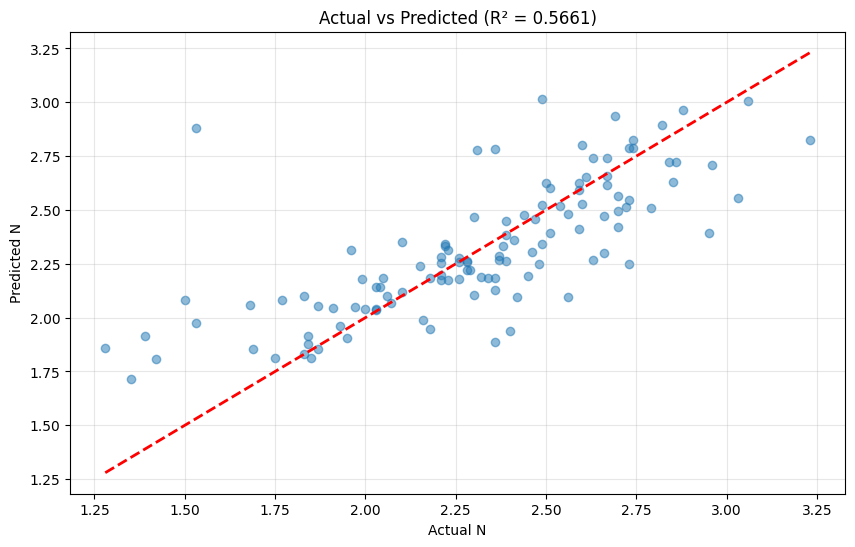

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual N')
plt.ylabel('Predicted N')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.grid(True, alpha=0.3)
plt.show()

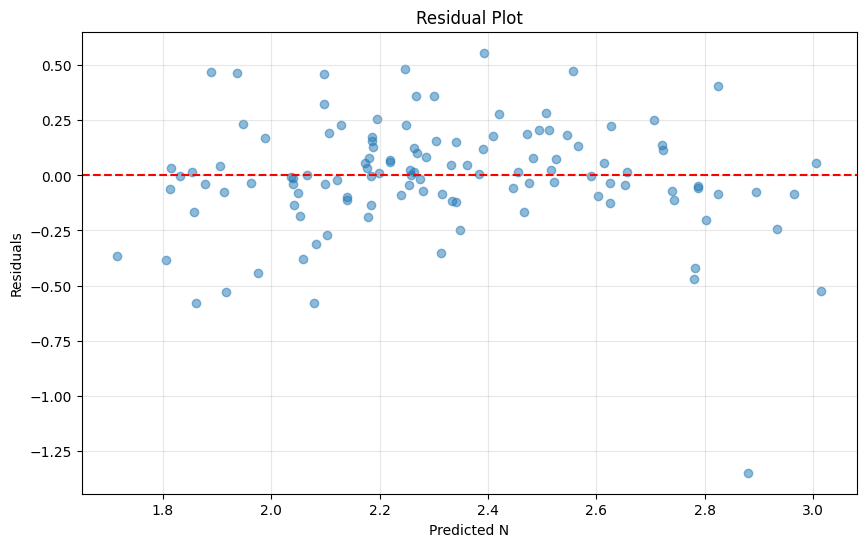

In [36]:
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted N')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

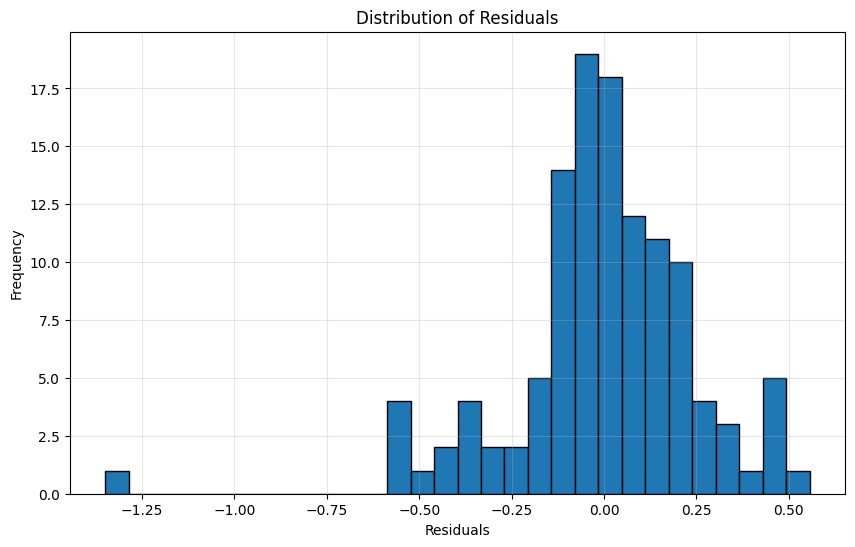

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)
plt.show()

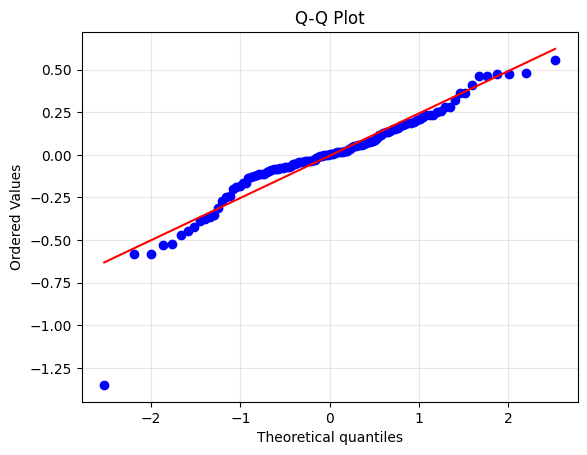

In [38]:
from scipy import stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(True, alpha=0.3)
plt.show()